# 1. Basic Usage

`TriPodPy` employs the `simframe` framework for running scientific simulations. For a detailed description of the usage of `simframe` please have a look at the [Simframe Documentation](https://simframe.rtfd.io/). The `tripod` Simulation class inherits many of its atributes from so for the basic structure looking at the [Dustpy Documentation](https://stammler.github.io/dustpy/) can be helpful.

This notebook demonstrates the basic steps of running a `TriPodPy` simulation:
- Initializing and running the most simple (default) `TriPodPy` model
- Plotting the data
- Resuming simulations from dump files

In [1]:
import numpy as np

## The Simulation Frame

To set up a model we have to import the `Simulation` class from the `tripod` package.

In [2]:
from tripod import Simulation

We can now create an instance of this class.

In [3]:
sim = Simulation()
sim.initialize()

At this stage `sim` is an empty simulation object that controls our simulation.

In [4]:
sim

DustPy
------
    components   : Group (components)
    dust         : Group (Dust quantities)
    gas          : Group (Gas quantities)
    grid         : Group (Grid quantities)
    star         : Group (Stellar quantities)
  -----
    t            : IntVar (Time [s]), Integration variable
  -----
    Integrator   : Integrator (Default integrator)
    Writer       : Writer (HDF5 file format using h5py)

All the fields are initialized with `None`. All attributes can be easiliy addressed via e.g.

In [5]:
sim.gas

Group (Gas quantities)
----------------------
    boundary     : Group (Boundary conditions)
    S            : Group (Source terms)
    torque       : Group (Torque parameters)
    v            : Group (Velocities)
  -----
    alpha        : Field (Turbulent alpha parameter)
    cs           : Field (Isothermal sound speed [cm/s])
    eta          : Field (Pressure gradient parameter)
    Fi           : Field (Gas flux interfaces [g/cm/s])
    Hp           : Field (Pressure scale height [cm])
    mfp          : Field (Midplane mean free path [cm])
    mu           : Field (Mean molecular weight [g])
    n            : Field (Miplane number density [1/cm³])
    nu           : Field (Kinematic viscosity [cm²/s])
    P            : Field (Midplane pressure [g/cm/s²])
    rho          : Field (Miplane mass density [g/cm³])
    Sigma        : Field (Surface density [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    T            : Field (Temperature [K])
  -----

## Initializing

We can now initialize the `sim` object with `Simulation.initialize()`. `TriPodPy` will then fill all the fields with default values.

As we can see, the `sim` object has now values assigned to its fields.  
**All quantities are in cgs units.**

In [6]:
sim.gas

Group (Gas quantities)
----------------------
    boundary     : Group (Boundary conditions)
    S            : Group (Source terms)
    torque       : Group (Torque parameters)
    v            : Group (Velocities)
  -----
    alpha        : Field (Turbulent alpha parameter)
    cs           : Field (Isothermal sound speed [cm/s])
    eta          : Field (Pressure gradient parameter)
    Fi           : Field (Gas flux interfaces [g/cm/s])
    Hp           : Field (Pressure scale height [cm])
    mfp          : Field (Midplane mean free path [cm])
    mu           : Field (Mean molecular weight [g])
    n            : Field (Miplane number density [1/cm³])
    nu           : Field (Kinematic viscosity [cm²/s])
    P            : Field (Midplane pressure [g/cm/s²])
    rho          : Field (Miplane mass density [g/cm³])
    Sigma        : Field (Surface density [g/cm²])
    SigmaFloor   : Field (Floor value of surface density [g/cm²])
    T            : Field (Temperature [K])
  -----

We can also display the full table of contents of the `sim` object.

In [7]:
sim.toc

DustPy
    - components: Group (components)
        - Default: Group (Atomic heliumDefault (dust_tracer=False, gas_active=True, gas_tracer=False))
            - boundary: Group (Boundary conditions for component)
            - dust: Group (Dust related fields)
                - Fi: Field (Gas flux [g/cm²/s])
                - pars: Group (Dust parameters)
                    - rhos: Field (Material density of dust grains [g/cm³])
                - S: Group (Gas source terms)
                    - coag: Field (Hydrodynamical source term [g/cm²/s])
                    - ext: Field (External source term [g/cm²/s])
                    - hyd: Field (Hydrodynamical source term [g/cm²/s])
                    - tot: Field (Total source term [g/cm²/s])
                - S_Sigma: Field (Source term for dust surface density [g/cm²])
                - Sigma: Field (Dust surface density [g/cm²])
                - Sigma_dot: Field (Gas surface density source term [g/cm²/s])
                - value: 

## Running a Simulation

The simulation is now ready to go. We can start it with ``Simulation.run()``. As the default simulation runs for 100,000 years, this will merely take a few moments.

In [8]:
sim.writer.overwrite = True

In [9]:
sim.run()


TriPoD v0.0.1

Creating data directory data.
Writing file data/data0000.hdf5
Writing dump file data/frame.dmp
Writing file data/data0001.hdf5
Writing dump file data/frame.dmp
Writing file data/data0002.hdf5
Writing dump file data/frame.dmp
Writing file data/data0003.hdf5
Writing dump file data/frame.dmp
Writing file data/data0004.hdf5
Writing dump file data/frame.dmp
Writing file data/data0005.hdf5
Writing dump file data/frame.dmp
Writing file data/data0006.hdf5
Writing dump file data/frame.dmp
Writing file data/data0007.hdf5
Writing dump file data/frame.dmp
Writing file data/data0008.hdf5
Writing dump file data/frame.dmp
Writing file data/data0009.hdf5
Writing dump file data/frame.dmp
Writing file data/data0010.hdf5
Writing dump file data/frame.dmp
Writing file data/data0011.hdf5
Writing dump file data/frame.dmp
Writing file data/data0012.hdf5
Writing dump file data/frame.dmp
Writing file data/data0013.hdf5
Writing dump file data/frame.dmp
Writing file data/data0014.hdf5
Writing dump

By default, `TriPodPy` has used the hdf5 writer to save output files to the `data/` directory.

## Plotting

`TriPodPy` is coming with a simple plotting script that can be used to check the status of a simulation.

In [10]:
from tripod import plot
import dustpy.constants as c

The plotting script does either take the simulation object as argument or a data directory.

If the argument is a simulation object the script is only plotting the current state.

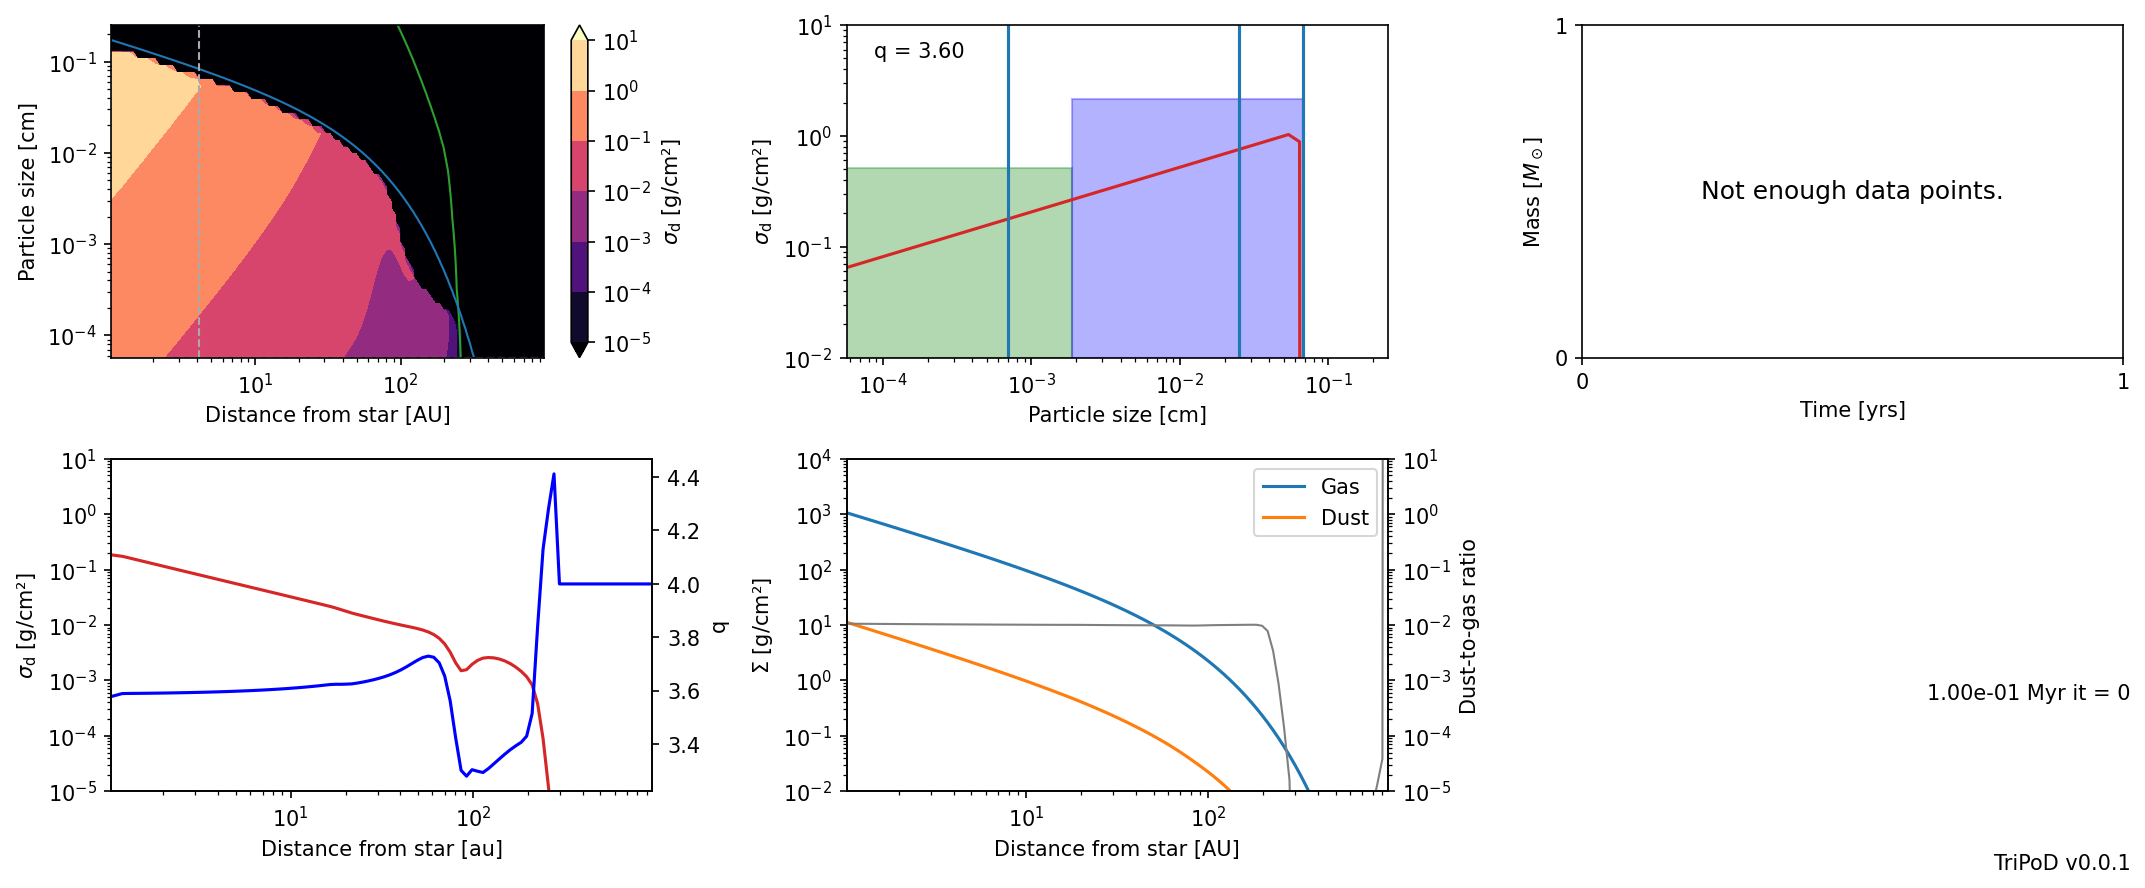

In [11]:
plot.panel(sim,show_limits=True,ir=20)

The blue and the green lines in the top left panel are analytical estimates for the fragmentation and drift barrier taken from [Birnstiel et al. (2012)](https://doi.org/10.1051/0004-6361/201118136).the middle panel on the top shows the size distribution at the radial index `ir`. the top right shows the mass evolution of dust and gas (if multiple snapshots are provided). the bottom left shows the midplane density of the dust (red) and the power law exponent q (blue). the bottom middle pannel shows the total dust and gas surface desity along with the dust do gas ratio (gray) as a function of radius. If we pass the data directory as argument, we also have access to the time evolution. Furthermore, some plots can be addressed by specifying the time `it`, radial `ir`, or size `ia` index.

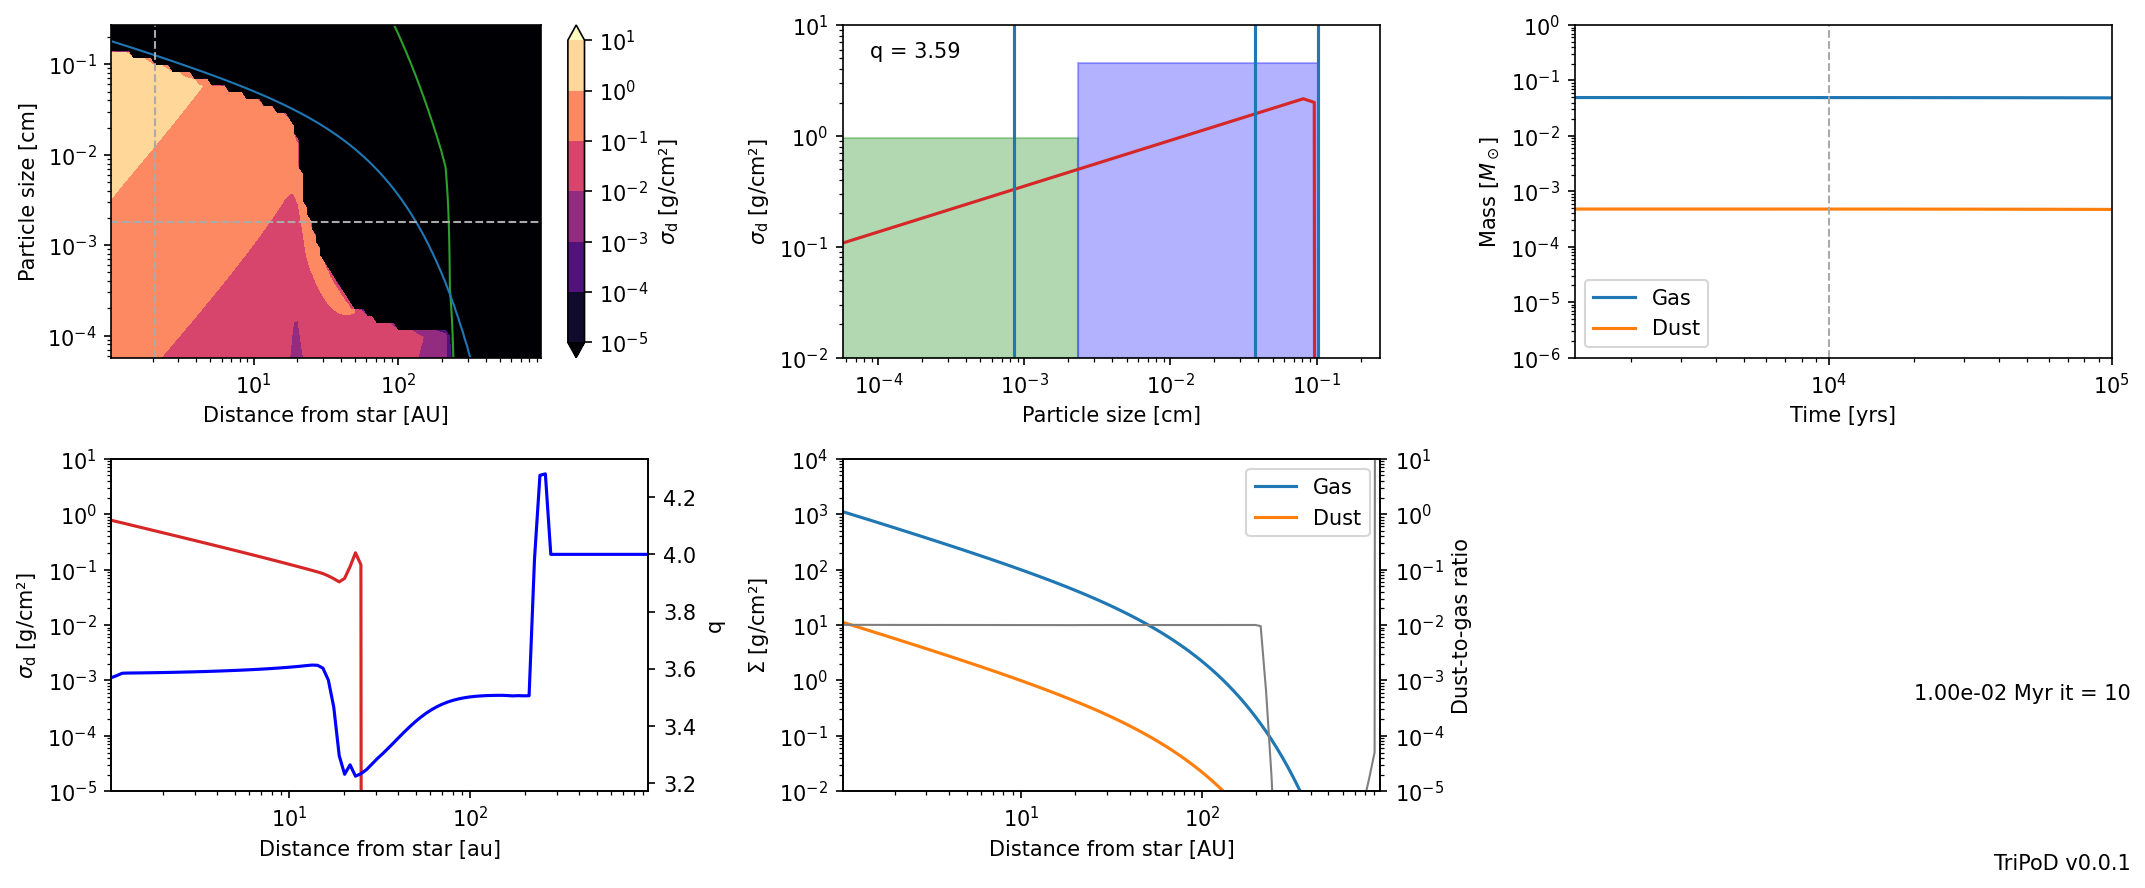

In [12]:
plot.panel("data", it=10, ir=10, ia=20,show_limits=True)

### Code Units
`TriPodPy`simulates the evolution of the dust surface density in terms of the two population surface densities $\Sigma_0$ and $\Sigma_1$.

Together, they constitute the total dust density $\Sigma_{tot} = \int \limits_{m\left(s_{min}\right)}^{m\left(s_{max}\right)} \sigma\left(m\right) \mathrm{d}m = \int \limits_{m\left(s_{min}\right)}^{m\left(s_{int}\right)} \sigma\left(m\right) \mathrm{d}m + \int \limits_{m\left(s_{int}\right)}^{m\left(s_{max}\right)} \sigma\left(m\right) \mathrm{d}m = \Sigma_0 + \Sigma_1$.

In [13]:
SigmaTot = sim.dust.Sigma.sum(-1)
SigmaTot

[1.11816465e+01 1.04183445e+01 9.70477551e+00 9.03822292e+00
 8.41623126e+00 7.83595545e+00 7.29466546e+00 6.78979477e+00
 6.31893572e+00 5.87983130e+00 5.47036721e+00 5.08856402e+00
 4.73256977e+00 4.40065277e+00 4.09119469e+00 3.80268401e+00
 3.53370963e+00 3.28295483e+00 3.04919145e+00 2.83127432e+00
 2.62813594e+00 2.43878143e+00 2.26228369e+00 2.09777883e+00
 1.94446187e+00 1.80158268e+00 1.66844213e+00 1.54438864e+00
 1.42881484e+00 1.32115458e+00 1.22088020e+00 1.12750002e+00
 1.04055614e+00 9.59622497e-01 8.84303228e-01 8.14231318e-01
 7.49067575e-01 6.88499863e-01 6.32242471e-01 5.80034566e-01
 5.31629104e-01 4.86701769e-01 4.44833737e-01 4.05750353e-01
 3.69280669e-01 3.35434352e-01 3.04187869e-01 2.75371203e-01
 2.48806414e-01 2.24327155e-01 2.01785224e-01 1.81051909e-01
 1.62016500e-01 1.44574390e-01 1.28627518e-01 1.14080000e-01
 1.00834994e-01 8.87948903e-02 7.78657906e-02 6.79631535e-02
 5.90140081e-02 5.09564151e-02 4.37432311e-02 3.73549731e-02
 3.17840475e-02 2.695523

In order to display the data in a more granular way and compare it to `Dustpy` outputs, we can use the distribution exponents $\xi$ to interpolate the dust surface density over a logarithmic mass grid. The density in the mass interval $\left[m_0, m_1\right]$ is then given by

$\Sigma_{[m_0, m_1]} = \int\limits_{m_0}^{m_1} \sigma\left(m\right) \mathrm{d}m = \Sigma_{tot} \frac{m_1^{\frac{\xi+4}{3}}-m_0^{\frac{\xi+4}{3}}}{m_{max}^{\frac{\xi+4}{3}}-m_{min}^{\frac{\xi+4}{3}}}$ for $\xi_{calc} \neq -4$ and $\Sigma_{tot} \frac{\log(m_1/m_0)}{\log(m_{max}/m_{min})}$ for $\xi_{calc} = -4$.

This calculation is automatically done in the data readout scheme of the plotting routine:

In [14]:
from tripod.utils import read_data
data = read_data("data")

The plotted dust density distribution is then given by

$\Sigma_\mathrm{d} = \int\limits_0^\infty \sigma \left(m \right) \mathrm{d} \log m$.

In this way the distribution is independent of the mass grid.

The code units `TriPodPy` uses after interpolation of the dust density are $\Sigma_{\mathrm{d},\,i} \equiv \Sigma_\mathrm{d} \left(m_i \right)$ with

$\Sigma_\mathrm{d} = \sum\limits_i \Sigma_{\mathrm{d},\,i}$,

meaning the numerical sum over the mass dimension is the dust surface density.

In [15]:
data.dust.Sigma_recon.sum(-1)[-1,...]

array([1.11816465e+01, 1.04183445e+01, 9.70477551e+00, 9.03822292e+00,
       8.41623126e+00, 7.83595545e+00, 7.29466546e+00, 6.78979477e+00,
       6.31893572e+00, 5.87983130e+00, 5.47036721e+00, 5.08856402e+00,
       4.73256977e+00, 4.40065277e+00, 4.09119469e+00, 3.80268401e+00,
       3.53370963e+00, 3.28295483e+00, 3.04919145e+00, 2.83127432e+00,
       2.62813594e+00, 2.43878143e+00, 2.26228369e+00, 2.09777883e+00,
       1.94446187e+00, 1.80158268e+00, 1.66844213e+00, 1.54438864e+00,
       1.42881484e+00, 1.32115458e+00, 1.22088020e+00, 1.12750002e+00,
       1.04055614e+00, 9.59622497e-01, 8.84303228e-01, 8.14231318e-01,
       7.49067575e-01, 6.88499863e-01, 6.32242471e-01, 5.80034566e-01,
       5.31629104e-01, 4.86701769e-01, 4.44833737e-01, 4.05750353e-01,
       3.69280669e-01, 3.35434352e-01, 3.04187869e-01, 2.75371203e-01,
       2.48806414e-01, 2.24327155e-01, 2.01785224e-01, 1.81051909e-01,
       1.62016500e-01, 1.44574390e-01, 1.28627518e-01, 1.14080000e-01,
      

For a more in depth analysis the internally used sizes and power law exponents can be found in the simulation Object/data under:

power law exponent of the particle size distribution:

In [16]:
sim.dust.qrec[:5]

[-3.57885522 -3.58436399 -3.58985937 -3.59026723 -3.59045478]

the minimum and maximum sizes of the distribution:

In [17]:
sim.dust.s.min[:5]

[5.22875516e-05 5.22875516e-05 5.22875516e-05 5.22875516e-05
 5.22875516e-05]

In [18]:
sim.dust.s.max[:5]

[0.13647524 0.13476168 0.13092258 0.12635921 0.12193889]

the size array with all the sizes used for the evolution of the distribution:

$[a_0, 0.4 * a_1, a_1, 0.4 * a_{max}, a_{max}]$

In [19]:
sim.dust.a[0,:]

[0.00097461 0.01991676 0.04979191 0.0545901  0.13647524]

this means all the dust quantities either have shape $(N_r, 2)$ or $(N_r, 5)$ depending if they are defined for the mass bins or the particle sizes

## Reading data files

If we want to read data files, we can use the read/writer module provided by `simframe` that is used to write the data.

In [20]:
from dustpy import hdf5writer

wrtr = hdf5writer()

We should make sure that the correct data directory is assigned to the writer.

In [21]:
wrtr

Writer (HDF5 file format using h5py)
------------------------------------
    Data directory : data
    File names     : data/data0000.hdf5
    Overwrite      : False
    Dumping        : True
    Options        : {'com': 'lzf', 'comopts': None}
    Verbosity      : 1

We can now read a single data file with

In [22]:
data0003 = wrtr.read.output(3)

This function returns a namespace and the data can simply be accessed in the same way as for the `Simulation` object.

In [23]:
data0003.gas.Sigma

array([1.11399371e+003, 1.03936331e+003, 9.69418292e+002, 9.03901717e+002,
       8.42577816e+002, 7.85223246e+002, 7.31620090e+002, 6.81552405e+002,
       6.34806398e+002, 5.91172929e+002, 5.50450541e+002, 5.12447758e+002,
       4.76984260e+002, 4.43891110e+002, 4.13010428e+002, 3.84194816e+002,
       3.57306712e+002, 3.32217749e+002, 3.08808143e+002, 2.86966128e+002,
       2.66587413e+002, 2.47574692e+002, 2.29837176e+002, 2.13290157e+002,
       1.97854607e+002, 1.83456798e+002, 1.70027947e+002, 1.57503892e+002,
       1.45824781e+002, 1.34934785e+002, 1.24781832e+002, 1.15317357e+002,
       1.06496066e+002, 9.82757223e+001, 9.06169385e+001, 8.34829889e+001,
       7.68396309e+001, 7.06549389e+001, 6.48991486e+001, 5.95445117e+001,
       5.45651595e+001, 4.99369755e+001, 4.56374756e+001, 4.16456957e+001,
       3.79420864e+001, 3.45084138e+001, 3.13276659e+001, 2.83839651e+001,
       2.56624852e+001, 2.31493726e+001, 2.08316729e+001, 1.86972608e+001,
       1.67347738e+001, 1

We can also read the entire data directory with

In [24]:
data = wrtr.read.all()

The data has now an additional dimension for time.

In [25]:
data.gas.Sigma.shape

(21, 100)

Data files can be quite large and reading the entire data set can consequently take some time. Instead, it is more efficient to only read single fields from the data files. We can do so via e.g.

In [26]:
SigmaGas = wrtr.read.sequence("gas.Sigma")

In [27]:
SigmaGas.shape

(21, 100)

It is also possible to exclude certain fields from being written into the data files to save memory by setting their `save` attribute to `False`.

In [28]:
sim.dust.v.save = False

## Reading Dump Files

The data files merely contain the pure data, but no information about the operations `TriPodPy` has to perform, e.g. customized functions. Hence, it is not possible to directly restart a simulation from data files.

`simframe` is saving by default the most recent dump file, from which a simulation can be restarted.

**Attention:** Malware can be injected with dump files, which are pickled objects. One should only read dump files that were created by oneself or from trusted sources! Dump files have to be read with the same version of `TriPodPy` as they were written. Otherwise, it is not guaranteed to work.

In [29]:
from dustpy import readdump

In [30]:
sim_restart = readdump("data/frame.dmp") 

This is now a simulation frame that should be identical to our previous object.

In [31]:
sim.gas.Sigma == sim_restart.gas.Sigma

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

We can now, for example, add more snapshots and restart the simulation. Here we just want to extend the run by one year.

In [32]:
from dustpy import constants as c

sim_restart.t.snapshots = np.concatenate((sim_restart.t.snapshots, [100001.*c.year]))

The current time is

In [33]:
sim_restart.t / c.year

100000.0

We can now restart the simulation for another year.

In [34]:
sim_restart.run()


TriPoD v0.0.1

Writing file data/data0021.hdf5
Writing dump file data/frame.dmp
Execution time: 0:00:00


Another file was written and the current time is now

In [35]:
sim_restart.t / c.year

100001.0